# Cryptocurrency가격예측_201710793_김지원

##  bitcoin,dogecoin,ethereum 의 가격예측을 LinearRegression으로 각각 예측해보고 신경망 알고리즘인 LSTM으로도 추후의 추세를 예측

In [24]:
import numpy as np
import pandas as pd
import sklearn.datasets as ds
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from IPython.display import display

from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Bitcoin

## btc 는 Datetimeindex 을 인덱스로 가지고 2013년부터 2021년 5월 30일까지의 데이터를 포함하고있는 (2955,9)shape를 가지는 table

In [25]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')

btc = pd.read_csv('./archive/Bitcoin.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)
 
btc["Year"] = btc.index.year
btc["month"] = btc.index.month
btc["day"] = btc.index.day
btc.sort_index()
#데이터 구조확인
print("#btc.shape=", btc.shape)   
print("#btc.dtypes = ", btc.dtypes)    #타입확인
print("#btc.index = ", btc.index)      #행 레이블
print("#btc.columns = ", btc.columns)  #열 레이블
btc

#btc.shape= (2955, 9)
#btc.dtypes =  Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
Year            int64
month           int64
day             int64
dtype: object
#btc.index =  DatetimeIndex(['2021-05-30', '2021-05-29', '2021-05-28', '2021-05-27',
               '2021-05-26', '2021-05-25', '2021-05-24', '2021-05-23',
               '2021-05-22', '2021-05-21',
               ...
               '2013-05-07', '2013-05-06', '2013-05-05', '2013-05-04',
               '2013-05-03', '2013-05-02', '2013-05-01', '2013-04-30',
               '2013-04-29', '2013-04-28'],
              dtype='datetime64[ns]', name='Date', length=2955, freq=None)
#btc.columns =  Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Year', 'month',
       'day'],
      dtype='object')


<ipython-input-25-8257e54a649b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


,Open,High,Low,Close,Volume,Market Cap,Year,month,day
Date,,,,,,,,,
2021-05-30,34607.405979,36400.668882,33520.737959,35678.129204,3.164608e+10,6.679766e+11,2021,5,30
2021-05-29,35684.156882,37234.498480,33693.929458,34616.068003,4.523101e+10,6.480610e+11,2021,5,29
2021-05-28,38507.083075,38856.967885,34779.039427,35697.606390,5.520019e+10,6.682839e+11,2021,5,28
2021-05-27,39316.889678,40379.617672,37247.903676,38436.968535,4.321097e+10,7.195381e+11,2021,5,27
2021-05-26,38392.623656,40782.078183,37905.834854,39294.197382,5.134674e+10,7.355564e+11,2021,5,26
...,...,...,...,...,...,...,...,...,...
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,2013,5,2
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,2013,5,1
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,2013,4,30


# Dogecoin

## dgc는 Datetimeindex 을 인덱스로 가지고 2013년부터 2021년 5월 30일까지의 데이터를 포함하고있는 (2724,9)shape를 가지는 table

In [26]:
dgc = pd.read_csv('./archive/Meme Coin/Dogecoin.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)

#datetime 을 year, month,day로 columns 추가
dgc["Year"] = dgc.index.year
dgc["month"] = dgc.index.month
dgc["day"] = dgc.index.day
dgc.sort_index()


print("#dgc.shape=", dgc.shape)   
print("#dgc.dtypes = ", dgc.dtypes)    #타입확인
print("#dgc.index = ", dgc.index)      #행 레이블
print("#dgc.columns = ", dgc.columns)  #열 레이블
dgc

#dgc.shape= (2724, 9)
#dgc.dtypes =  Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
Year            int64
month           int64
day             int64
dtype: object
#dgc.index =  DatetimeIndex(['2021-05-30', '2021-05-29', '2021-05-28', '2021-05-27',
               '2021-05-26', '2021-05-25', '2021-05-24', '2021-05-23',
               '2021-05-22', '2021-05-21',
               ...
               '2013-12-24', '2013-12-23', '2013-12-22', '2013-12-21',
               '2013-12-20', '2013-12-19', '2013-12-18', '2013-12-17',
               '2013-12-16', '2013-12-15'],
              dtype='datetime64[ns]', name='Date', length=2724, freq=None)
#dgc.columns =  Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Year', 'month',
       'day'],
      dtype='object')


<ipython-input-25-8257e54a649b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


,Open,High,Low,Close,Volume,Market Cap,Year,month,day
Date,,,,,,,,,
2021-05-30,0.302969,0.310324,0.287680,0.302224,1.929948e+09,3.923259e+10,2021,5,30
2021-05-29,0.311398,0.317918,0.281793,0.303110,2.470711e+09,3.934490e+10,2021,5,29
2021-05-28,0.333651,0.347879,0.301518,0.311205,3.289456e+09,4.039136e+10,2021,5,28
2021-05-27,0.353463,0.353463,0.328144,0.332945,2.485942e+09,4.320847e+10,2021,5,27
2021-05-26,0.346396,0.365920,0.338857,0.353693,3.355793e+09,4.589616e+10,2021,5,26
...,...,...,...,...,...,...,...,...,...
2013-12-19,0.000395,0.001520,0.000328,0.001162,0.000000e+00,1.115034e+07,2013,12,19
2013-12-18,0.000267,0.000362,0.000205,0.000362,0.000000e+00,3.188943e+06,2013,12,18
2013-12-17,0.000207,0.000289,0.000116,0.000269,0.000000e+00,2.169688e+06,2013,12,17


# Ethereum

## eth 는 Datetimeindex 을 인덱스로 가지고 2015년부터 2021년 5월 30일까지의 데이터를 포함하고있는 (2124,9)shape를 가지는 table

In [27]:
eth = pd.read_csv('./archive/Ethereum.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)

#datetime 을 year, month,day로 columns 추가
eth["Year"] = eth.index.year
eth["month"] = eth.index.month
eth["day"] = eth.index.day
eth.sort_index()


print("#eth.shape=", eth.shape)   
print("#eth.dtypes = ", eth.dtypes)    #타입확인
print("#eth.index = ", eth.index)      #행 레이블
print("#eth.columns = ", eth.columns)  #열 레이블
eth

#eth.shape= (2124, 9)
#eth.dtypes =  Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap    float64
Year            int64
month           int64
day             int64
dtype: object
#eth.index =  DatetimeIndex(['2021-05-30', '2021-05-29', '2021-05-28', '2021-05-27',
               '2021-05-26', '2021-05-25', '2021-05-24', '2021-05-23',
               '2021-05-22', '2021-05-21',
               ...
               '2015-08-16', '2015-08-15', '2015-08-14', '2015-08-13',
               '2015-08-12', '2015-08-11', '2015-08-10', '2015-08-09',
               '2015-08-08', '2015-08-07'],
              dtype='datetime64[ns]', name='Date', length=2124, freq=None)
#eth.columns =  Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Year', 'month',
       'day'],
      dtype='object')


<ipython-input-25-8257e54a649b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


,Open,High,Low,Close,Volume,Market Cap,Year,month,day
Date,,,,,,,,,
2021-05-30,2278.288703,2472.187818,2188.834504,2390.305302,2.587662e+10,2.774930e+11,2021,5,30
2021-05-29,2414.067182,2566.938597,2208.490927,2279.514177,3.377372e+10,2.646004e+11,2021,5,29
2021-05-28,2742.468984,2761.363366,2336.361233,2419.906290,3.999911e+10,2.808641e+11,2021,5,28
2021-05-27,2888.752388,2888.752388,2642.607841,2736.488586,3.337364e+10,3.175710e+11,2021,5,27
2021-05-26,2707.052740,2911.735706,2652.094510,2888.698681,4.249977e+10,3.351965e+11,2021,5,26
...,...,...,...,...,...,...,...,...,...
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.463100e+06,6.456929e+07,2015,8,11
2015-08-10,0.713989,0.729854,0.636546,0.708448,4.052830e+05,4.281836e+07,2015,8,10
2015-08-09,0.706136,0.879810,0.629191,0.701897,5.321700e+05,4.239957e+07,2015,8,9


# bitcoin,dogecoin,ethereum 각각의 information 출력

In [28]:
print("bitcoin information: ",btc.info())
print()
print("dogecoin information: ",dgc.info())
print()
print("ethereum information: ",eth.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2955 entries, 2021-05-30 to 2013-04-28
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2955 non-null   float64
 1   High        2955 non-null   float64
 2   Low         2955 non-null   float64
 3   Close       2955 non-null   float64
 4   Volume      2955 non-null   float64
 5   Market Cap  2955 non-null   float64
 6   Year        2955 non-null   int64  
 7   month       2955 non-null   int64  
 8   day         2955 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 230.9 KB
bitcoin information:  None

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2724 entries, 2021-05-30 to 2013-12-15
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2724 non-null   float64
 1   High        2724 non-null   float64
 2   Low         2724 non-null   float64
 3   Close      

# bitcoin,dogecoin,ethereum 각각의 결측치 확인후 출력

In [29]:
#결측치 확인
print("bitcoin-isnull?: \n",btc.isnull().sum())
print()
print("dogecoin-isnull?: \n",dgc.isnull().sum())
print()
print("ethereum-isnull?: \n",eth.isnull().sum())

bitcoin-isnull?: 
 Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Year          0
month         0
day           0
dtype: int64

dogecoin-isnull?: 
 Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Year          0
month         0
day           0
dtype: int64

ethereum-isnull?: 
 Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Year          0
month         0
day           0
dtype: int64


# bitcoin,dogecoin,ethereum 각각의 중복 데이터가 있는지 확인 후 출력

In [30]:
#중복 데이터 확인
print("bitcoin duplicated?: \n",btc.duplicated().sum())
print()
print("dogecoin duplicated?: \n",dgc.duplicated().sum())
print()
print("ethereum duplicated?: \n",btc.duplicated().sum())

bitcoin duplicated?: 
 0

dogecoin duplicated?: 
 0

ethereum duplicated?: 
 0


# bitcoin,dogecoin,ethereum 각각의 요약통계 출력

In [31]:
#data understand
#요약통계
print("bitcoin describe: \n",btc.describe())
print()
print("dogecoin describe: \n",dgc.describe())
print()
print("ethereum describe: \n",eth.describe())

bitcoin describe: 
                Open          High           Low         Close        Volume  \
count   2955.000000   2955.000000   2955.000000   2955.000000  2.955000e+03   
mean    6335.324625   6516.959129   6136.718573   6347.042212  1.056280e+10   
std    10876.083867  11218.088927  10477.248005  10888.222758  1.873778e+10   
min       68.504997     74.561096     65.526001     68.431000  0.000000e+00   
25%      425.753494    433.962509    420.514008    425.904999  2.978355e+07   
50%     1780.369995   1833.489990   1716.300049   1804.910034  7.799140e+08   
75%     8302.427698   8503.060861   8132.105724   8297.584961  1.530497e+10   
max    63523.754869  64863.098908  62208.964366  63503.457930  3.509679e+11   

         Market Cap         Year        month          day  
count  2.955000e+03  2955.000000  2955.000000  2955.000000  
mean   1.139914e+11  2016.868020     6.504907    15.740778  
std    2.030594e+11     2.366727     3.434299     8.805878  
min    7.784112e+08  201

# bitcoin의 과거부터 현재까지의 그래프

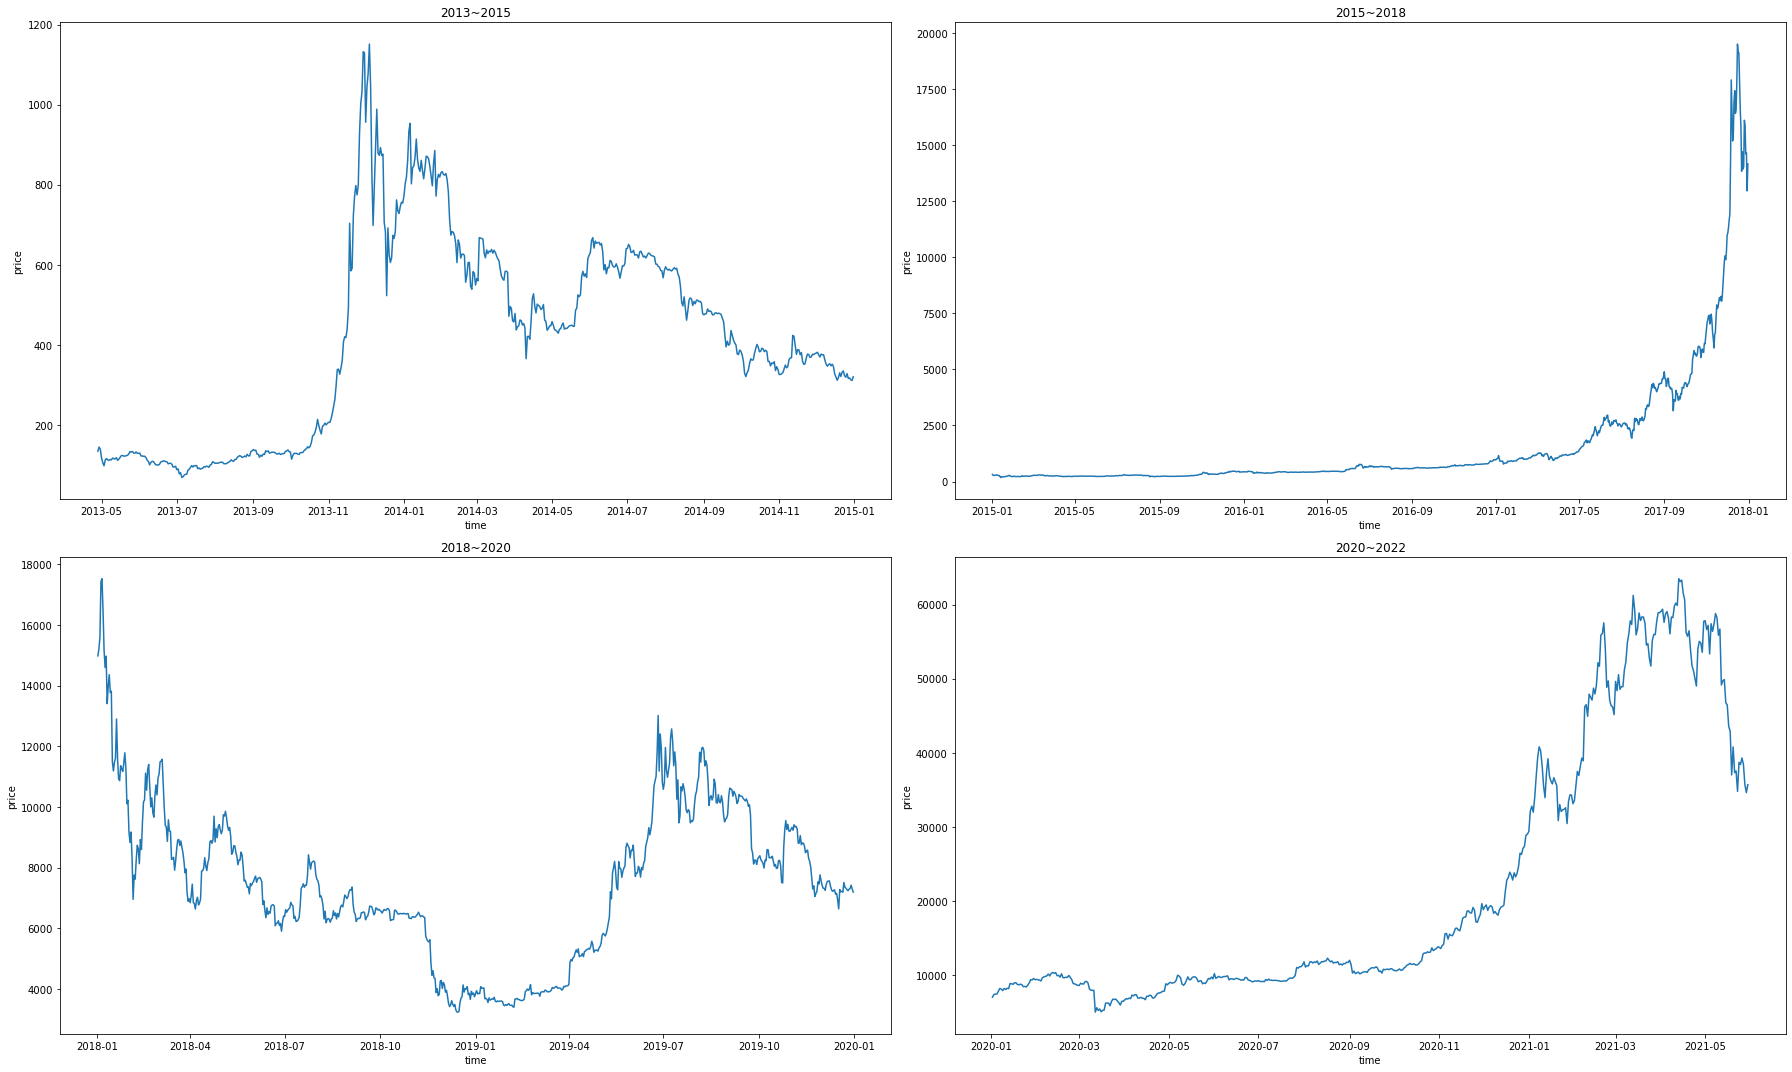

In [32]:
#그래프로 지정한 기간의 그래프를 보기위해 나누기
time_steps = [['2013', '2015'],
              ['2015', '2018'],
              ['2018', '2020'], 
              ['2020', '2022']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(25, 15)
for i in range(4):
    ax = axes[i//2, i%2]
    df = btc.loc[(btc.index > time_steps[i][0]) & (btc.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

# dogecoin의 과거부터 현재까지의 그래프

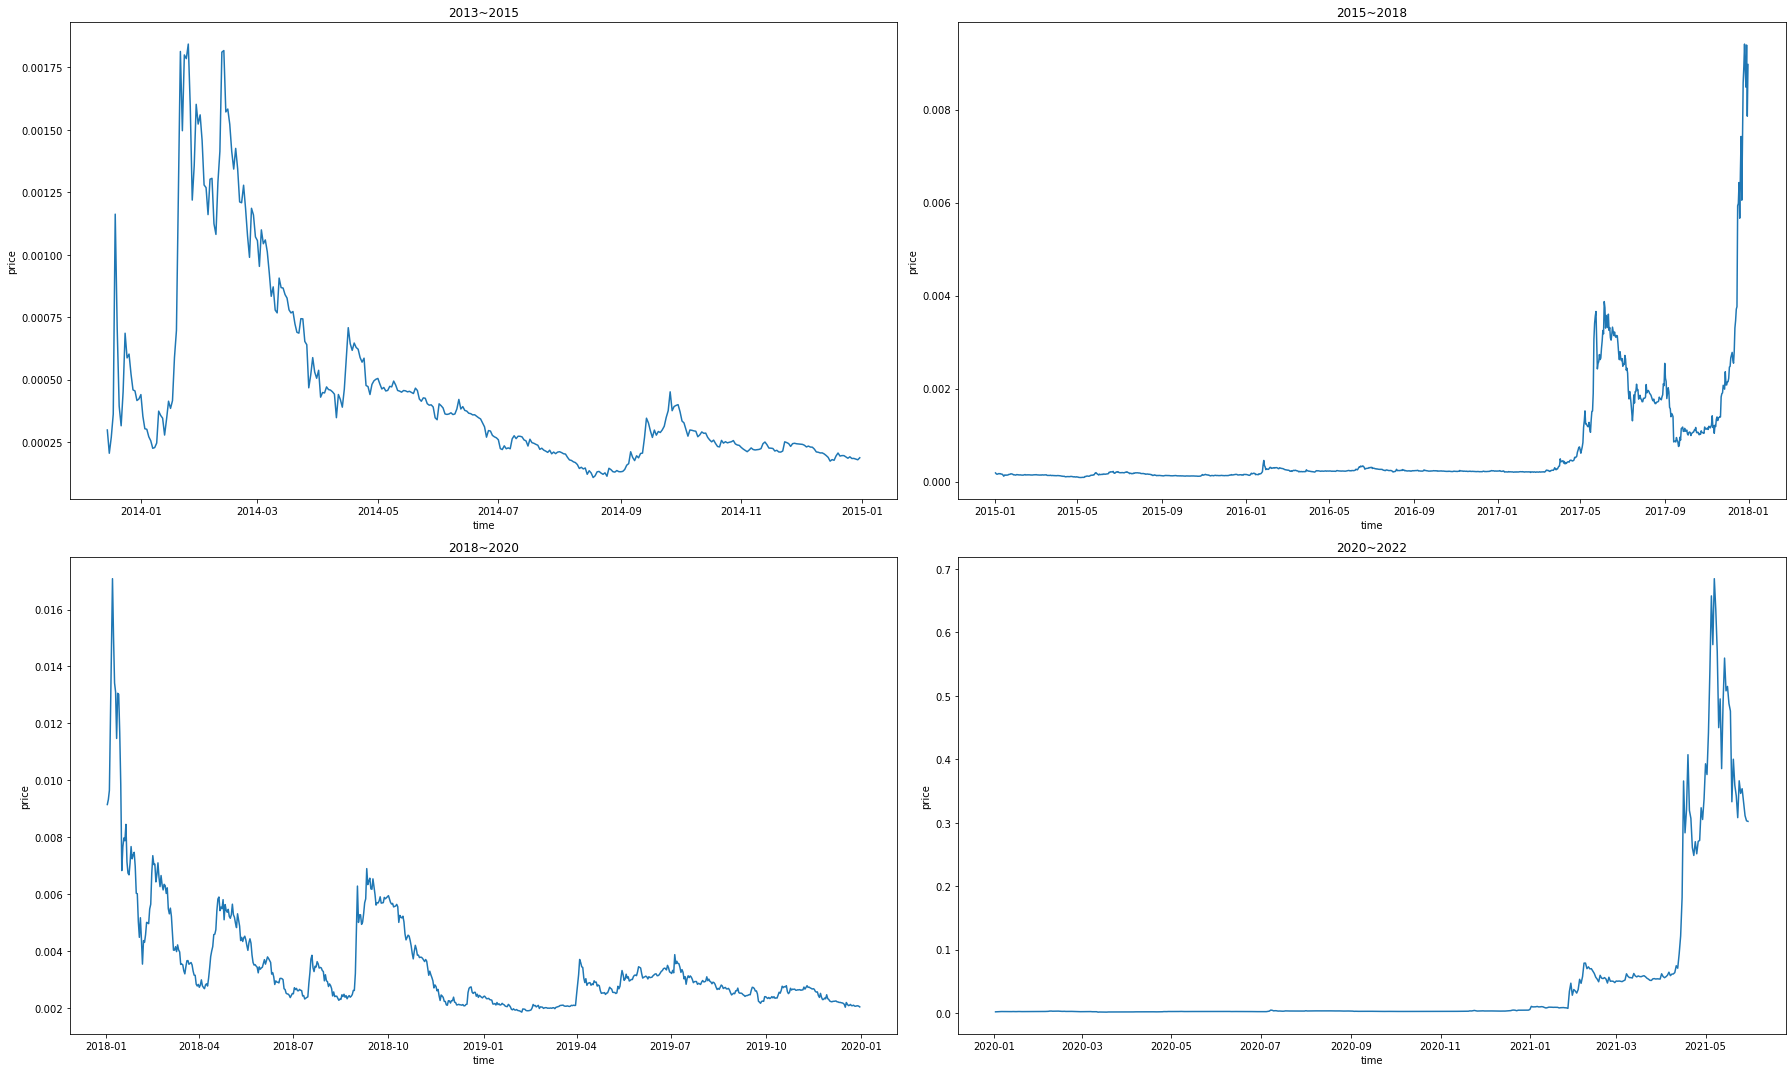

In [33]:
#그래프로 지정한 기간의 그래프를 보기위해 나누기

time_steps = [['2013', '2015'], 
              ['2015', '2018'],
              ['2018', '2020'], 
              ['2020', '2022']]
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(25, 15)
for i in range(4):
    ax = axes[i//2, i%2]
    df = dgc.loc[(dgc.index > time_steps[i][0]) & (dgc.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

# ethereum의 과거부터 현재까지의 그래프

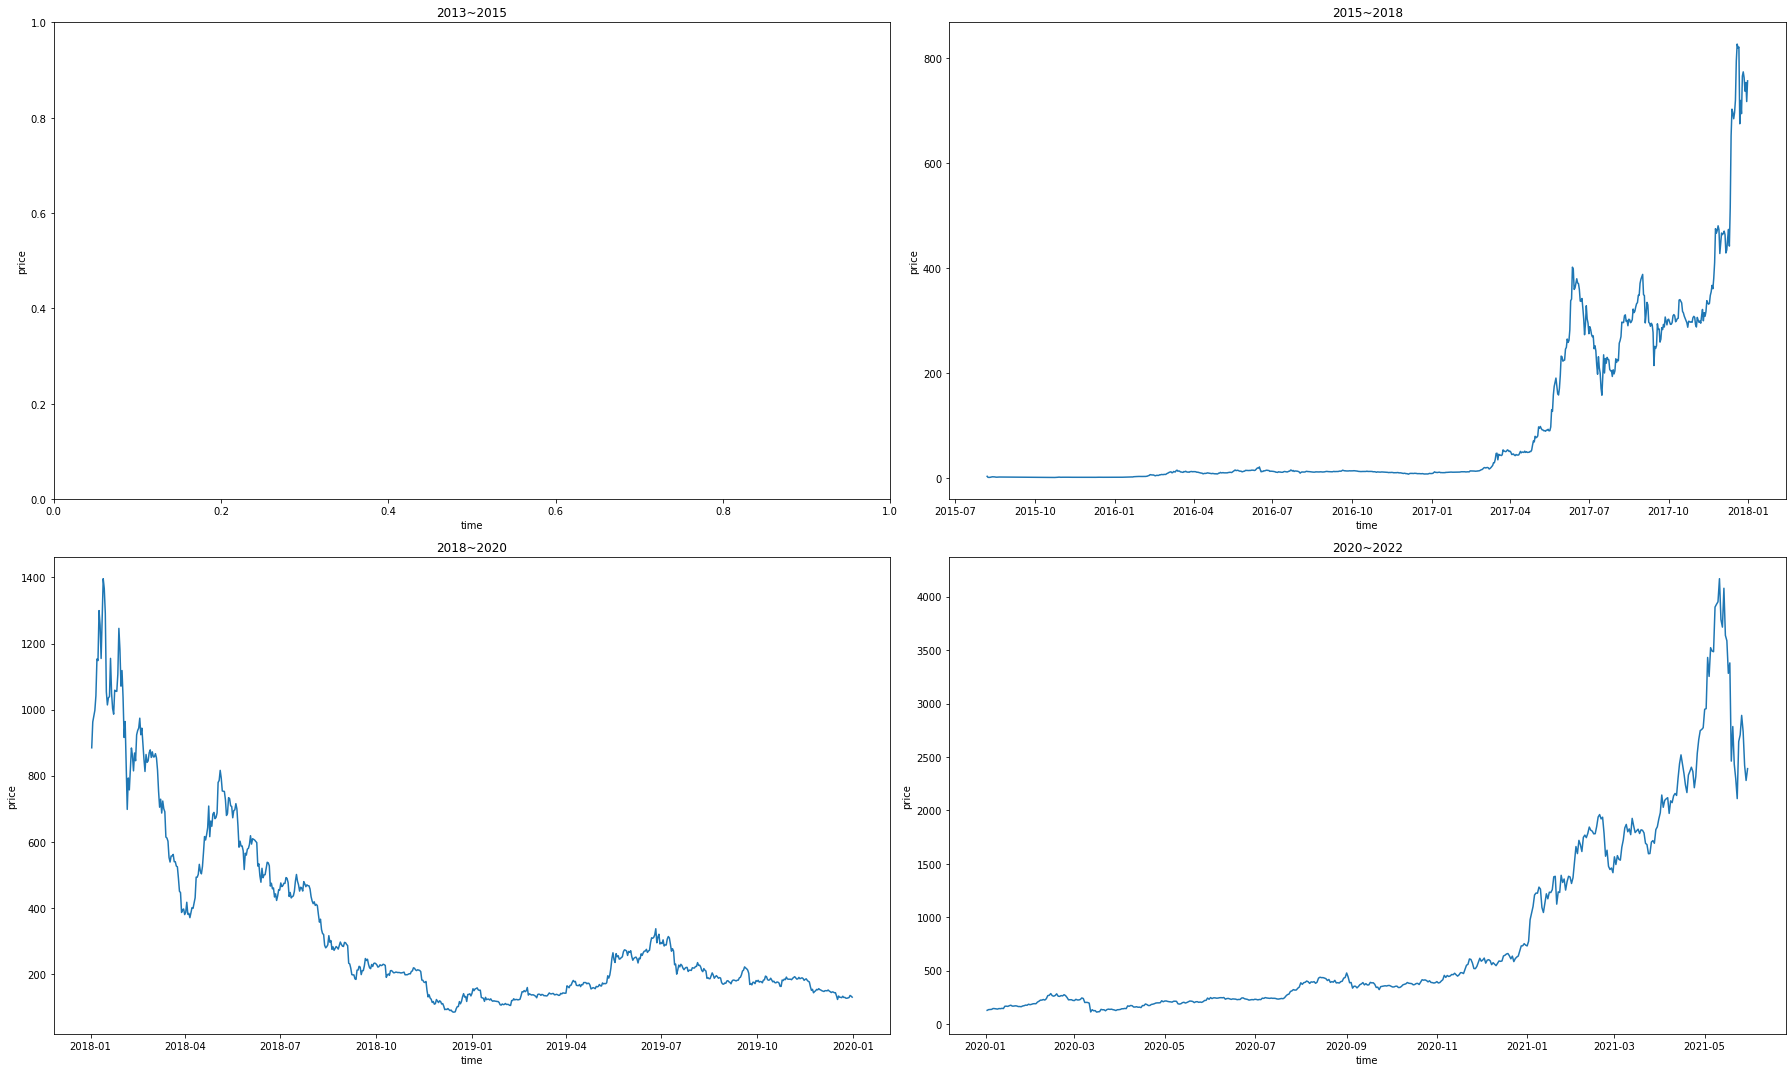

In [34]:
#그래프로 지정한 기간의 그래프를 보기위해 나누기

time_steps = [['2013', '2015'], 
              ['2015', '2018'],
              ['2018', '2020'], 
              ['2020', '2022']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(25, 15)
for i in range(4):
    ax = axes[i//2, i%2]
    df = eth.loc[(eth.index > time_steps[i][0]) & (eth.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

# 예측 하려는 2021년의 bitcoin table을 추출후 close값을 그래프로 확인

In [35]:
#bitcoin의 2021년 데이터 구분
btc2021 = btc[btc['Year']==2021]
feature_names =  ['Close']
b2021 = btc2021[feature_names]

b2021.sort_index(ascending=True)
print(b2021.isnull().sum())
print(b2021)

Close    0
dtype: int64
                   Close
Date                    
2021-05-30  35678.129204
2021-05-29  34616.068003
2021-05-28  35697.606390
2021-05-27  38436.968535
2021-05-26  39294.197382
...                  ...
2021-01-05  33992.429344
2021-01-04  31971.913522
2021-01-03  32782.024466
2021-01-02  32127.267939
2021-01-01  29374.151889

[150 rows x 1 columns]


Text(0, 0.5, 'price')

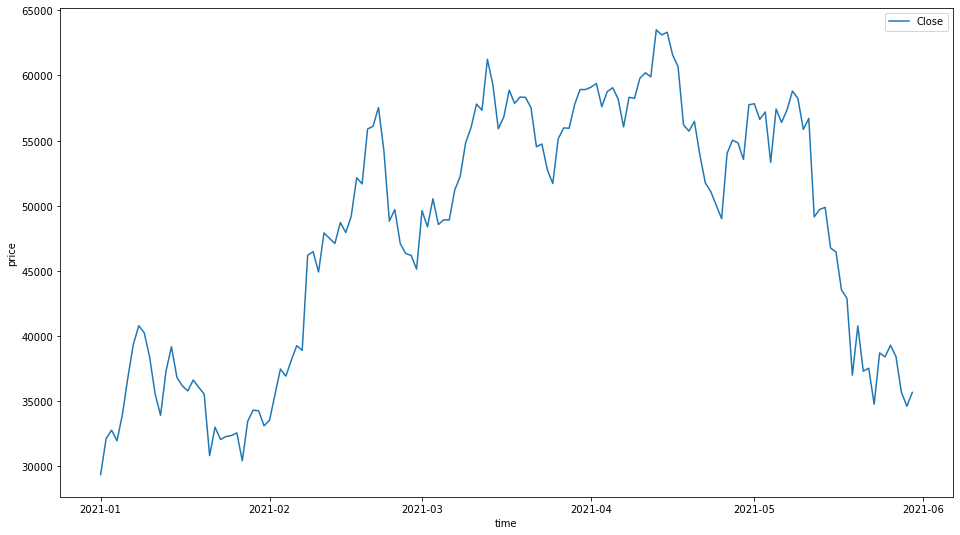

In [36]:
plt.figure(figsize=(16, 9))
sns.lineplot(data = b2021)
plt.xlabel('time')
plt.ylabel('price')

<AxesSubplot:xlabel='Date'>

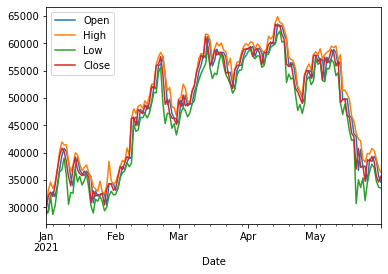

In [37]:
scale_cols = ['Open', 'High', 'Low', 'Close']
aaa = btc2021[['Open', 'High', 'Low', 'Close']]
aaa.plot()


# 2021 bitcoin의 Volume(거래량) 그래프

<AxesSubplot:xlabel='Date'>

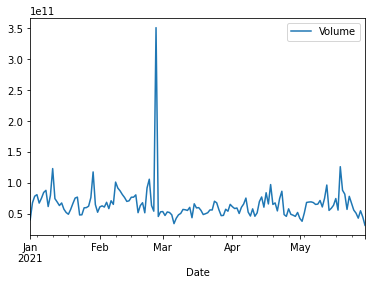

In [38]:
scale_cols = ['Volume']
aaa = btc2021[['Volume']]
aaa.plot()

# LinearRegression는 손실함수로 오차의 자승의 합의 평균인 MSE를 사용하며 경사하강법의 최적화 알고리즘을 사용하는 1차 선형 모델이다.

# MSE(Mean Squared Error) 는 평균제곱 오차
$$ MSE = \frac{1}{N} \sum_{i=1}^N(y_i-f(x_i))^2 $$

In [50]:
time_steps = [['2013', '2022']]

bdf = btc.loc[(btc.index > time_steps[0][0]) & (btc.index < time_steps[0][1])]
bdf

,Open,High,Low,Close,Volume,Market Cap,Year,month,day
Date,,,,,,,,,
2021-05-30,34607.405979,36400.668882,33520.737959,35678.129204,3.164608e+10,6.679766e+11,2021,5,30
2021-05-29,35684.156882,37234.498480,33693.929458,34616.068003,4.523101e+10,6.480610e+11,2021,5,29
2021-05-28,38507.083075,38856.967885,34779.039427,35697.606390,5.520019e+10,6.682839e+11,2021,5,28
2021-05-27,39316.889678,40379.617672,37247.903676,38436.968535,4.321097e+10,7.195381e+11,2021,5,27
2021-05-26,38392.623656,40782.078183,37905.834854,39294.197382,5.134674e+10,7.355564e+11,2021,5,26
...,...,...,...,...,...,...,...,...,...
2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,2013,5,2
2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,2013,5,1
2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,2013,4,30


In [51]:
scale_cols = ['Close', 'Open' ,'High', 'Low','Volume']#'Open',


In [52]:
df = pd.DataFrame(bdf,columns = scale_cols)

# train_test_split의 train에 close는 예측하려는 값이므로 drop해준다.

In [53]:
xx_train,xx_test,yy_train,yy_test = train_test_split(df.drop('Close',1), df['Close'], test_size=0.4, random_state=2021, shuffle=False)

In [54]:
#linearRegression으로 학습
lr = LinearRegression()
lr = lr.fit(xx_train,yy_train)



w = lr.coef_       #계수
b = lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

# 학습결과
print("훈련세트 점수: {:.4f}".format(lr.score(xx_train, yy_train)))
print("테스트 세트 점수: {:.4f}".format(lr.score(xx_test, yy_test)))

#학습간 feature들의 영향
coeff = pd.Series(data=np.round(lr.coef_,1), index = xx_train.columns)
coeff.sort_values(ascending=False)

w (lr.coef_): [-4.94246213e-01  8.83435187e-01  6.05493107e-01  5.10529909e-10]
b (lr.intercept_): -0.40868653507459385
훈련세트 점수: 0.9994
테스트 세트 점수: 0.9982


High      0.9
Low       0.6
Volume    0.0
Open     -0.5
dtype: float64

# 테스트 결과 high과 low값이 결과에 많이 기여한것을 확인한다.

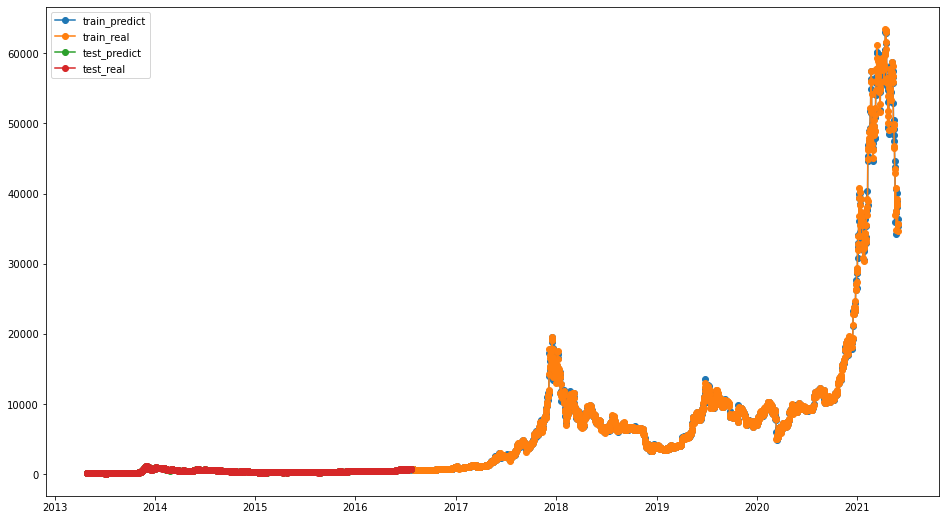

In [55]:

pre = lr.predict(xx_train)
ppre = lr.predict(xx_test)
plt.figure(figsize=(16, 9))
plt.plot(xx_train.index, pre, marker='o',label = "train_predict") 
plt.plot(yy_train.index,yy_train,marker='o',label='train_real')

plt.plot(xx_test.index, ppre, marker='o',label = "test_predict") 
plt.plot(yy_test.index,yy_test,marker='o',label = "test_real")

plt.legend()


In [56]:
print(ppre,yy_test)

[651.49321974 659.27378151 663.25686525 ... 139.38933715 144.57504647
 132.83495539] Date
2016-07-22    650.619019
2016-07-21    665.012024
2016-07-20    665.684998
2016-07-19    672.864014
2016-07-18    673.106018
                 ...    
2013-05-02    105.209999
2013-05-01    116.989998
2013-04-30    139.000000
2013-04-29    144.539993
2013-04-28    134.210007
Name: Close, Length: 1182, dtype: float64


## 2021년 5월 30일까지의 데이터를 학습했으므로 새로운 데이터에는 5월 31일 부터 6월 6일까지의 데이터를 추가해 이 데이터는 예측값과 실제값을 비교하는데 사용한다.

In [57]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')
#예측하기위한 실제 데이터
nbtc = pd.read_csv('./arc/Bitcoin.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)
nbtc

<ipython-input-57-a9ee2fc08722>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-06-09,33416.97785,37537.37115,32475.86603,37345.12149,53972919008,7.000000e+11
2021-06-08,33589.52086,34017.38798,31114.44247,33472.63175,49902050442,6.270000e+11
2021-06-07,35835.26551,36790.57216,33480.64124,33560.70784,33683936663,6.290000e+11
2021-06-06,35538.60873,36436.42096,35304.58008,35862.37773,28913440585,6.720000e+11
2021-06-05,36880.15597,37917.71415,34900.41224,35551.95873,35959473399,6.660000e+11
2021-06-04,39242.48626,39242.48626,35717.72230,36894.40533,41831090187,6.910000e+11
2021-06-03,37599.40994,39478.95118,37243.97373,39208.76599,35460750427,7.340000e+11
2021-06-02,36699.92292,38231.33918,35966.30716,37575.17958,33070867190,7.040000e+11
2021-06-01,37293.79237,37896.73619,35787.08597,36684.92452,34639423297,6.870000e+11


In [58]:
scale_cols = ['Open','High', 'Low','Volume'] #'High', 'Low','Open',조절 가능
bt_x_ntest = pd.DataFrame(nbtc,columns = scale_cols)
print(bt_x_ntest)
scale_cols = ['Close']
bt_x_real = pd.DataFrame(nbtc,columns = scale_cols)
print(bt_x_real)

                   Open         High          Low       Volume
Date                                                          
2021-06-09  33416.97785  37537.37115  32475.86603  53972919008
2021-06-08  33589.52086  34017.38798  31114.44247  49902050442
2021-06-07  35835.26551  36790.57216  33480.64124  33683936663
2021-06-06  35538.60873  36436.42096  35304.58008  28913440585
2021-06-05  36880.15597  37917.71415  34900.41224  35959473399
2021-06-04  39242.48626  39242.48626  35717.72230  41831090187
2021-06-03  37599.40994  39478.95118  37243.97373  35460750427
2021-06-02  36699.92292  38231.33918  35966.30716  33070867190
2021-06-01  37293.79237  37896.73619  35787.08597  34639423297
2021-05-31  35658.59296  37468.24899  34241.94356  39009847639
                  Close
Date                   
2021-06-09  37345.12149
2021-06-08  33472.63175
2021-06-07  33560.70784
2021-06-06  35862.37773
2021-06-05  35551.95873
2021-06-04  36894.40533
2021-06-03  39208.76599
2021-06-02  37575.17958
2021

## 왼쪽부터 2021년 6월 9일 순서로 bitcoin의 6월 9일 실제값은 37345.12149 예측 값은36336.67886801 결과 도출(달러)

In [59]:
#학습으로 인한 예측 값
bt_result =lr.predict(bt_x_ntest)
print(bt_result)

[36336.67886801 32315.31226788 35079.72717614 36015.42594938
 36419.87420138 36920.52494144 38862.39309303 37429.93839796
 36733.10421583 36229.4128159 ]


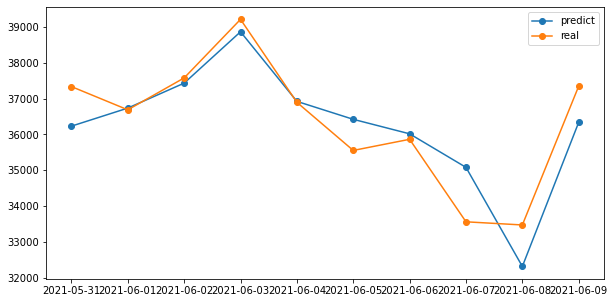

In [60]:
# 예측값과 실제 값 비교
def bit_ly_result():
    plt.figure(figsize=(10, 5))
    plt.plot(bt_x_ntest.index, bt_result, marker='o',label = "predict") 
    plt.plot(bt_x_real.index,bt_x_real,marker='o',label='real')


    plt.legend()

bit_ly_result()

# 같은 방법으로 진행

In [44]:
time_steps = [['2021', '2022']]

dgco = dgc.loc[(dgc.index > time_steps[0][0]) & (dgc.index < time_steps[0][1])]
print(dgco)

scale_cols = ['Open','Close', 'High', 'Low', 'Volume']  
doge_df = pd.DataFrame(dgco,columns = scale_cols)

xx_train,xx_test,yy_train,yy_test = train_test_split(doge_df.drop('Close',1), doge_df['Close'], test_size=0.4, random_state=2021, shuffle=False)

                Open      High       Low     Close        Volume  \
Date                                                               
2021-05-30  0.302969  0.310324  0.287680  0.302224  1.929948e+09   
2021-05-29  0.311398  0.317918  0.281793  0.303110  2.470711e+09   
2021-05-28  0.333651  0.347879  0.301518  0.311205  3.289456e+09   
2021-05-27  0.353463  0.353463  0.328144  0.332945  2.485942e+09   
2021-05-26  0.346396  0.365920  0.338857  0.353693  3.355793e+09   
...              ...       ...       ...       ...           ...   
2021-01-06  0.009923  0.010854  0.009685  0.010465  7.499155e+08   
2021-01-05  0.009767  0.010219  0.008972  0.009920  6.872561e+08   
2021-01-04  0.009784  0.011421  0.007878  0.009767  1.372399e+09   
2021-01-03  0.010602  0.013867  0.009409  0.009771  2.707004e+09   
2021-01-02  0.005686  0.013698  0.005584  0.010615  3.421563e+09   

              Market Cap  Year  month  day  
Date                                        
2021-05-30  3.923259e+10 

In [45]:
doge_lr = LinearRegression()
doge_lr = doge_lr.fit(xx_train,yy_train)



w = doge_lr.coef_       #계수
b = doge_lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련세트 점수: {:.4f}".format(doge_lr.score(xx_train, yy_train)))
print("테스트 세트 점수: {:.4f}".format(doge_lr.score(xx_test, yy_test)))

coeff = pd.Series(data=np.round(doge_lr.coef_,1), index = xx_train.columns)
coeff.sort_values(ascending=False)



w (lr.coef_): [-4.35136179e-01  5.25586186e-01  9.29655398e-01  1.06971661e-12]
b (lr.intercept_): -0.0011176670879197992
훈련세트 점수: 0.9935
테스트 세트 점수: 0.9557


Low       0.9
High      0.5
Volume    0.0
Open     -0.4
dtype: float64

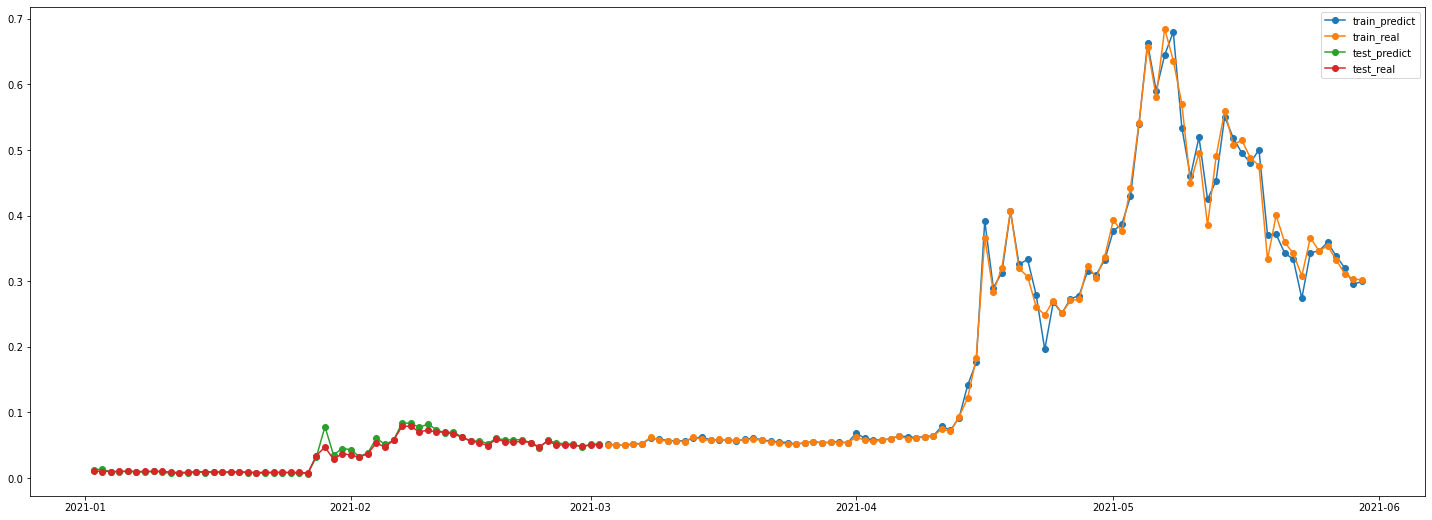

In [46]:

pre = doge_lr.predict(xx_train)
ppre = doge_lr.predict(xx_test)
plt.figure(figsize=(25, 9))
plt.plot(xx_train.index, pre, marker='o',label = "train_predict") 
plt.plot(yy_train.index,yy_train,marker='o',label='train_real')

plt.plot(xx_test.index, ppre, marker='o',label = "test_predict") 
plt.plot(yy_test.index,yy_test,marker='o',label = "test_real")

plt.legend()


In [47]:
print(ppre,yy_test)

[0.05166861 0.05127094 0.04685505 0.05140119 0.05173795 0.05351295
 0.05712157 0.04576435 0.05366035 0.05834328 0.0579712  0.05793973
 0.06029591 0.05232956 0.05670668 0.0556759  0.06188797 0.07035181
 0.06834364 0.07380802 0.08195823 0.0771623  0.08332436 0.08387737
 0.05721223 0.0510871  0.06046535 0.03805316 0.03249534 0.04327006
 0.04475896 0.03499529 0.07807377 0.03216072 0.00663072 0.00730886
 0.00763886 0.00794437 0.00776804 0.00725289 0.00744117 0.00789951
 0.00859574 0.00838958 0.00826635 0.00858989 0.00823725 0.00862364
 0.00741483 0.00755101 0.00675032 0.00918042 0.00982355 0.00882453
 0.00894381 0.01007515 0.00907903 0.00941894 0.01320013 0.0124587 ] Date
2021-03-02    0.050262
2021-03-01    0.050599
2021-02-28    0.048052
2021-02-27    0.050083
2021-02-26    0.050480
2021-02-25    0.050167
2021-02-24    0.056555
2021-02-23    0.047392
2021-02-22    0.053725
2021-02-21    0.055980
2021-02-20    0.054384
2021-02-19    0.055139
2021-02-18    0.059541
2021-02-17    0.049376
20

In [48]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')
dtc = pd.read_csv('./arc/Dogecoin.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)
dtc
 

<ipython-input-48-06081ea7052f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-06-09,0.326423,0.353762,0.313131,0.343331,3154332929,44616868086
2021-06-08,0.331822,0.341435,0.296660,0.327687,3918487504,42579375329
2021-06-07,0.371566,0.379678,0.329806,0.331050,3043974994,43011807788
2021-06-06,0.371676,0.376798,0.367254,0.371807,1836611411,48302113586
2021-06-05,0.376752,0.393886,0.360488,0.372177,3464039041,48345164969
2021-06-04,0.400982,0.400982,0.351442,0.376323,5889983048,48877461705
2021-06-03,0.423739,0.440763,0.378819,0.399963,6809900030,51942452228
2021-06-02,0.370302,0.444590,0.352588,0.423374,11425588479,54976914119
2021-06-01,0.325744,0.383079,0.312360,0.370077,5796031087,48050998401


In [63]:
 
scale_cols = ['Open','High', 'Low','Volume'] #'High', 'Low''Open',
dg_x_ntest = pd.DataFrame(dtc,columns = scale_cols)
print(dg_x_ntest)
scale_cols = ['Close']
dg_x_real = pd.DataFrame(dtc,columns = scale_cols)
print(dg_x_real)


 

                Open      High       Low       Volume
Date                                                 
2021-06-09  0.326423  0.353762  0.313131   3154332929
2021-06-08  0.331822  0.341435  0.296660   3918487504
2021-06-07  0.371566  0.379678  0.329806   3043974994
2021-06-06  0.371676  0.376798  0.367254   1836611411
2021-06-05  0.376752  0.393886  0.360488   3464039041
2021-06-04  0.400982  0.400982  0.351442   5889983048
2021-06-03  0.423739  0.440763  0.378819   6809900030
2021-06-02  0.370302  0.444590  0.352588  11425588479
2021-06-01  0.325744  0.383079  0.312360   5796031087
2021-05-31  0.301949  0.329163  0.294330   2440829325
               Close
Date                
2021-06-09  0.343331
2021-06-08  0.327687
2021-06-07  0.331050
2021-06-06  0.371807
2021-06-05  0.372177
2021-06-04  0.376323
2021-06-03  0.399963
2021-06-02  0.423374
2021-06-01  0.370077
2021-05-31  0.325810


In [64]:
dg_result =doge_lr.predict(dg_x_ntest)
print(dg_result)


[0.33725471 0.3139315  0.34661596 0.37857668 0.38080006 0.36817201
 0.40561292 0.41142853 0.3550669  0.31673366]


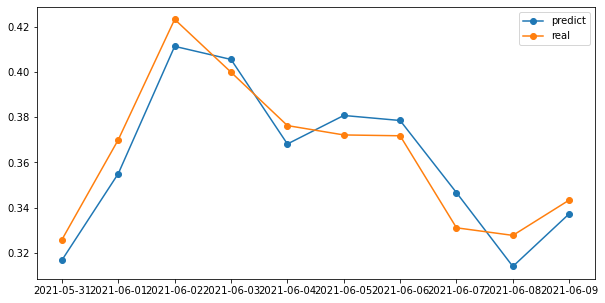

In [62]:

def doge_ly_result():
    plt.figure(figsize=(10, 5))
    plt.plot(dg_x_ntest.index, dg_result, marker='o',label = "predict") 
    plt.plot(dg_x_real.index,dg_x_real,marker='o',label='real')


    plt.legend()
    
doge_ly_result()


## 왼쪽부터 2021년 6월 9일 순서로 dogecoin의 6월 9일 실제값은 0.343331 예측 값은 0.33837547 결과 도출

# 같은 방법으로 진행

In [69]:
time_steps = [['2018', '2022']]

ethc = eth.loc[(eth.index > time_steps[0][0]) & (eth.index < time_steps[0][1])]
print(ethc)

scale_cols = ['Open', 'Close', 'High', 'Low', 'Volume'] #'High', 'Low',
eth_df = pd.DataFrame(ethc,columns = scale_cols)

xx_train,xx_test,yy_train,yy_test = train_test_split(eth_df.drop('Close',1), eth_df['Close'], test_size=0.4, random_state=2021, shuffle=False)


                   Open         High          Low        Close        Volume  \
Date                                                                           
2021-05-30  2278.288703  2472.187818  2188.834504  2390.305302  2.587662e+10   
2021-05-29  2414.067182  2566.938597  2208.490927  2279.514177  3.377372e+10   
2021-05-28  2742.468984  2761.363366  2336.361233  2419.906290  3.999911e+10   
2021-05-27  2888.752388  2888.752388  2642.607841  2736.488586  3.337364e+10   
2021-05-26  2707.052740  2911.735706  2652.094510  2888.698681  4.249977e+10   
...                 ...          ...          ...          ...           ...   
2018-01-06   995.153992  1060.709961   994.622009  1041.680054  4.662220e+09   
2018-01-05   975.750000  1075.390015   956.325012   997.719971  6.683150e+09   
2018-01-04   961.713013  1045.079956   946.085999   980.921997  6.502860e+09   
2018-01-03   886.000000   974.471008   868.450989   962.719971  5.093160e+09   
2018-01-02   772.346008   914.830017   7

In [70]:

eth_lr = LinearRegression()
eth_lr = eth_lr.fit(xx_train,yy_train)



w = eth_lr.coef_       #계수
b = eth_lr.intercept_  #절편
print("w (lr.coef_):", w)
print("b (lr.intercept_):",b )

print("훈련세트 점수: {:.4f}".format(eth_lr.score(xx_train, yy_train)))
print("테스트 세트 점수: {:.4f}".format(eth_lr.score(xx_test, yy_test)))

coeff = pd.Series(data=np.round(eth_lr.coef_,1), index = xx_train.columns)
coeff.sort_values(ascending=False)


w (lr.coef_): [-5.71440851e-01  8.76778248e-01  6.90090911e-01  2.34872546e-10]
b (lr.intercept_): -1.3001186684966797
훈련세트 점수: 0.9990
테스트 세트 점수: 0.9978


High      0.9
Low       0.7
Volume    0.0
Open     -0.6
dtype: float64

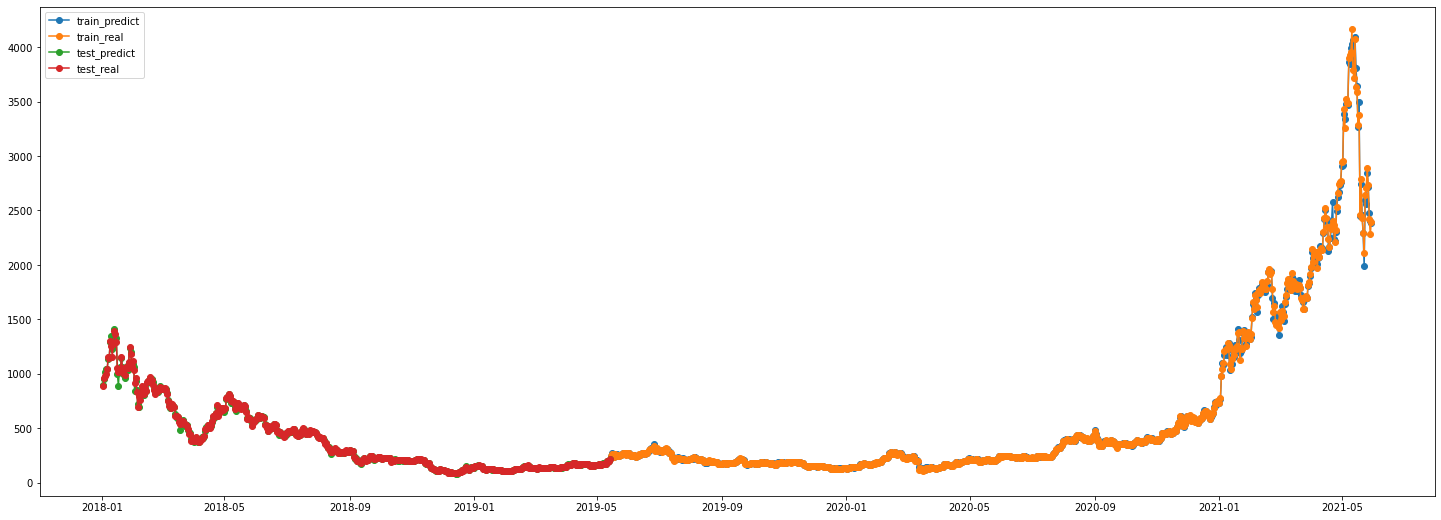

In [71]:

pre = eth_lr.predict(xx_train)
ppre = eth_lr.predict(xx_test)
plt.figure(figsize=(25, 9))
plt.plot(xx_train.index, pre, marker='o',label = "train_predict") 
plt.plot(yy_train.index,yy_train,marker='o',label='train_real')

plt.plot(xx_test.index, ppre, marker='o',label = "test_predict") 
plt.plot(yy_test.index,yy_test,marker='o',label = "test_real")

plt.legend()


In [72]:
print(ppre,yy_test)

[ 215.59386131  201.74020073  193.91570065  200.59229967  174.09555847
  169.54270282  168.92104345  177.41411017  171.6418722   161.59670476
  165.59550524  168.07079213  161.51724893  161.40448522  161.00221565
  154.77557749  157.72457331  158.9719713   155.63900114  157.65508447
  164.72067909  175.06823158  171.15843475  169.31163127  174.35429994
  171.21107689  173.73170811  166.60025406  165.64773064  162.21298948
  166.00076116  164.14841389  162.46768832  166.83807898  181.42593435
  176.37848557  183.04309782  173.07907593  168.7177473   165.43552681
  160.05597493  172.38905379  162.56431232  141.21173077  140.23609433
  147.06074043  140.52508452  138.25984666  139.61365218  133.65449632
  134.26696945  136.05661053  138.1235508   137.419362    137.00075362
  138.53909196  139.76047571  140.25742026  139.29249063  142.94539017
  136.94801633  133.76639267  132.39233422  132.19391654  133.88149443
  135.68110534  137.71311411  135.23877133  138.55376244  137.61714111
  135.

In [73]:

ethrc = pd.read_csv('./arc/Ethereum.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)
ethrc

 

<ipython-input-57-a9ee2fc08722>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates,'%d-%m-%Y')


,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2021-06-09,2510.199192,2625.070674,2412.197802,2608.266986,36075832186,3.030000e+11
2021-06-08,2594.602350,2620.846269,2315.546579,2517.438624,41909736778,2.930000e+11
2021-06-07,2713.047394,2845.185019,2583.995219,2590.263304,30600111277,3.010000e+11
2021-06-06,2629.748703,2743.441092,2616.162395,2715.092661,25311639414,3.150000e+11
2021-06-05,2691.619506,2817.484904,2558.233703,2630.576801,30496672724,3.060000e+11
2021-06-04,2857.165616,2857.165616,2562.637385,2688.194999,34173841611,3.120000e+11
2021-06-03,2708.376141,2891.254971,2667.684221,2855.126531,30038207402,3.320000e+11
2021-06-02,2634.455996,2801.392396,2555.401481,2706.124971,27723267359,3.140000e+11
2021-06-01,2707.560596,2739.737607,2531.160641,2633.518417,27363223090,3.060000e+11


In [74]:
scale_cols = ['Open','High', 'Low','Volume'] #'High', 'Low'
et_x_ntest = pd.DataFrame(ethrc,columns = scale_cols)
print(et_x_ntest)
scale_cols = ['Close']
et_x_real = pd.DataFrame(ethrc,columns = scale_cols)
print(et_x_real)



                   Open         High          Low       Volume
Date                                                          
2021-06-09  2510.199192  2625.070674  2412.197802  36075832186
2021-06-08  2594.602350  2620.846269  2315.546579  41909736778
2021-06-07  2713.047394  2845.185019  2583.995219  30600111277
2021-06-06  2629.748703  2743.441092  2616.162395  25311639414
2021-06-05  2691.619506  2817.484904  2558.233703  30496672724
2021-06-04  2857.165616  2857.165616  2562.637385  34173841611
2021-06-03  2708.376141  2891.254971  2667.684221  30038207402
2021-06-02  2634.455996  2801.392396  2555.401481  27723267359
2021-06-01  2707.560596  2739.737607  2531.160641  27363223090
2021-05-31  2387.198474  2715.855016  2279.505225  31007383150
                  Close
Date                   
2021-06-09  2608.266986
2021-06-08  2517.438624
2021-06-07  2590.263304
2021-06-06  2715.092661
2021-06-05  2630.576801
2021-06-04  2688.194999
2021-06-03  2855.126531
2021-06-02  2706.124971
2021

In [75]:

et_result =eth_lr.predict(et_x_ntest)
print(et_result)

[2538.98338635 2421.72020096 2733.32884643 2712.67841819 2703.48467576
 2647.57865781 2834.01236687 2719.43479217 2606.78931153 2596.10837684]


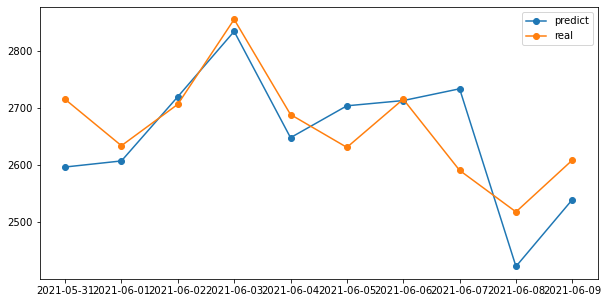

In [280]:
def eth_ly_result():
    plt.figure(figsize=(10, 5))
    plt.plot(et_x_ntest.index, et_result, marker='o',label = "predict") 
    plt.plot(et_x_real.index,et_x_real,marker='o',label='real')


    plt.legend()
    
eth_ly_result()

## 왼쪽부터 2021년 6월 9일 순서로 ethereum의 6월 9일 실제값은 2608.266986 예측 값은 2538.98338635 결과 도출

# linear regression 예측 특징으로 전날 실제값이 다음날 예측값에 반영되는것을 확인 주로 이동평균선에 활용됨

# ---------------------------------------------------------------------------------------------

## RNN(Recurrent Nenural Network)
    과거의 이벤트가 미래의 결과에 영향을 줄 수 있는 순환 구조를 가짐
    직전 데이터와 현재데이터 간의 상관관계에서 다음 데이터를 예측하기 위해 신경망 모델을 만듦
    직전 정보만 참고하는 것이 아닌 과거의 정보를 고려해야하는 경우가 생김
    이를 해결하고자 lstm을 사용

###  과거 정보를 버릴지 말지 결정하는 과정
	
###  현재정보를 저장할지 결정하는 과정

###  과거 정보를 새로운 정보로 업데이트 하는 과정

###  어떤 출력값을 출력할지 결정하는 과정


In [145]:
import tensorflow as tf

# 정규화(MinMaxScaler)를 통해 데이터들이 0,1사이의 값들로 변환

In [146]:
rbtc = pd.read_csv('./rnn/Bitcoin.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)
 

scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close']
scaled = scaler.fit_transform(rbtc[scale_cols])
scaled = pd.DataFrame(scaled, columns=scale_cols)
scaled.columns = scale_cols
scaled



<ipython-input-136-06081ea7052f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


,Open,High,Low,Close
0,0.525543,0.578232,0.521541,0.587636
1,0.528262,0.523902,0.499633,0.526589
2,0.563653,0.566705,0.537709,0.527978
3,0.558978,0.561239,0.567060,0.564262
4,0.580120,0.584103,0.560556,0.559368
...,...,...,...,...
2960,0.000754,0.000788,0.000431,0.000580
2961,0.001111,0.001008,0.000679,0.000765
2962,0.001190,0.001117,0.001103,0.001112
2963,0.001039,0.001126,0.001102,0.001200


## make dataset은 train_test_split을 하기위해 window size 를 기준으로 train_feature과 train_y값으로 배분

In [147]:
def make_dataset(tx ,ty, window_size=20):
    tx_list = []
    ty_list = []
    for i in range(len(tx)-window_size):
        tx_list.append(np.array(tx.iloc[i:i+window_size]))
        ty_list.append(np.array(ty.iloc[i+window_size]))
    return np.array(tx_list), np.array(ty_list)

## test size는 과거로부터n일 전 까지의 데이터와 n일 전 부터 현재까지의 데이터를 train 과 test배열로 나눈다


In [148]:
TEST_SIZE = 40
WINDOW_SIZE = 20

train = scaled[:-TEST_SIZE]
test = scaled[-TEST_SIZE:]

print(train.shape)
a = ['Open', 'High', 'Low']
b = ['Close']
train_feature = train[a]
train_y = train[b]

train_feature,train_y = make_dataset(train_feature,train_y,20)

x_train,x_v,y_train,y_v = train_test_split(train_feature,train_y, test_size=0.2)


(2925, 4)


In [149]:
x_train.shape

(2324, 20, 3)

In [150]:
test_feature = test[a]
test_y = test[b]
test_feature,test_y = make_dataset(test_feature,test_y,20)
print(test_feature.shape)
print(test_y.shape)

(20, 20, 3)
(20, 1)


# Sequential 순차적 모델
# Long Short-Term Memory models

In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

# 학습방식에 대한 환경 설정
# 손실함수는 mse로 설정
# earlystopping 은 학습중 loss값에 변화가 더이상 없을 경우 학습을 중단하고 결과 출력 checkpoint에 저장

## epoch는 각 데이터의 size가 2324인 batch(16)가 들어간 (2324/16)146 번의 iteration으로 나누어집니다.
 

# 그리고 전체 데이터셋에 대해서는 epochs 200 번의 학습이 이루어졌으며, iteration 기준으로 총 최대 29200 번의 학습을한다.


In [152]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
bt_early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
bt_filename = os.path.join(model_path, 'tmp_checkpoint.h5')
bt_checkpoint = ModelCheckpoint(bt_filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
bt_history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_v, y_v), 
                                    callbacks=[bt_early_stop, bt_checkpoint])

Epoch 1/200
146/146 [==============================] - 3s 9ms/step - loss: 0.0012 - val_loss: 1.6277e-04

Epoch 00001: val_loss improved from inf to 0.00016, saving model to model\tmp_checkpoint.h5
Epoch 2/200
146/146 [==============================] - 1s 5ms/step - loss: 1.3050e-04 - val_loss: 1.1311e-04

Epoch 00002: val_loss improved from 0.00016 to 0.00011, saving model to model\tmp_checkpoint.h5
Epoch 3/200
146/146 [==============================] - 1s 5ms/step - loss: 1.0149e-04 - val_loss: 9.9255e-05

Epoch 00003: val_loss improved from 0.00011 to 0.00010, saving model to model\tmp_checkpoint.h5
Epoch 4/200
146/146 [==============================] - 1s 5ms/step - loss: 9.3116e-05 - val_loss: 8.0871e-05

Epoch 00004: val_loss improved from 0.00010 to 0.00008, saving model to model\tmp_checkpoint.h5
Epoch 5/200
146/146 [==============================] - 1s 5ms/step - loss: 9.4621e-05 - val_loss: 6.8020e-05

Epoch 00005: val_loss improved from 0.00008 to 0.00007, saving model to mo

146/146 [==============================] - 1s 5ms/step - loss: 2.0210e-05 - val_loss: 1.3390e-05

Epoch 00046: val_loss did not improve from 0.00001
Epoch 47/200
146/146 [==============================] - 1s 6ms/step - loss: 1.2256e-05 - val_loss: 1.3581e-05

Epoch 00047: val_loss did not improve from 0.00001
Epoch 48/200
146/146 [==============================] - 1s 6ms/step - loss: 1.2970e-05 - val_loss: 7.8942e-06

Epoch 00048: val_loss improved from 0.00001 to 0.00001, saving model to model\tmp_checkpoint.h5
Epoch 49/200
146/146 [==============================] - 1s 5ms/step - loss: 1.5383e-05 - val_loss: 8.1877e-06

Epoch 00049: val_loss did not improve from 0.00001
Epoch 50/200
146/146 [==============================] - 1s 5ms/step - loss: 9.5419e-06 - val_loss: 9.7447e-06

Epoch 00050: val_loss did not improve from 0.00001
Epoch 51/200
146/146 [==============================] - 1s 5ms/step - loss: 9.2639e-06 - val_loss: 9.2957e-06

Epoch 00051: val_loss did not improve from 0.00

In [156]:
model.load_weights(bt_filename)

pred = model.predict(test_feature)

pred.shape

(20, 1)

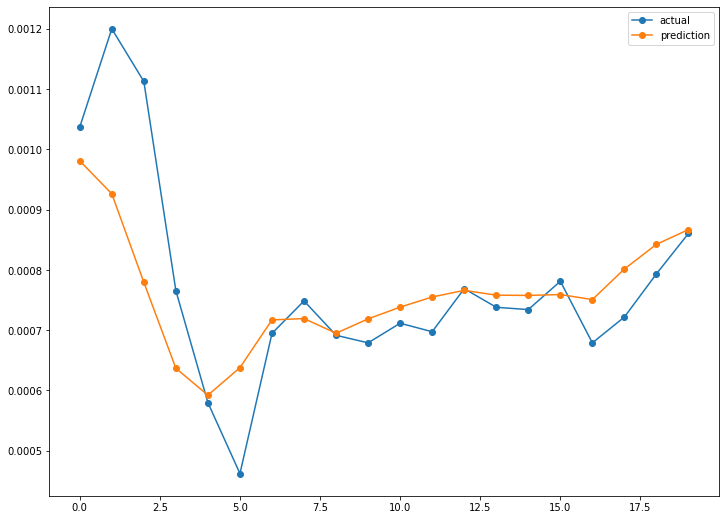

In [238]:
def bt_ls_result():
    plt.figure(figsize=(12,9))

    plt.plot(np.asarray(test_y[-30:])[::-1],marker='o', label = 'actual')
    plt.plot(pred[-30:][::-1], label = 'prediction',marker='o')
    plt.legend()
    plt.show()

bt_ls_result()

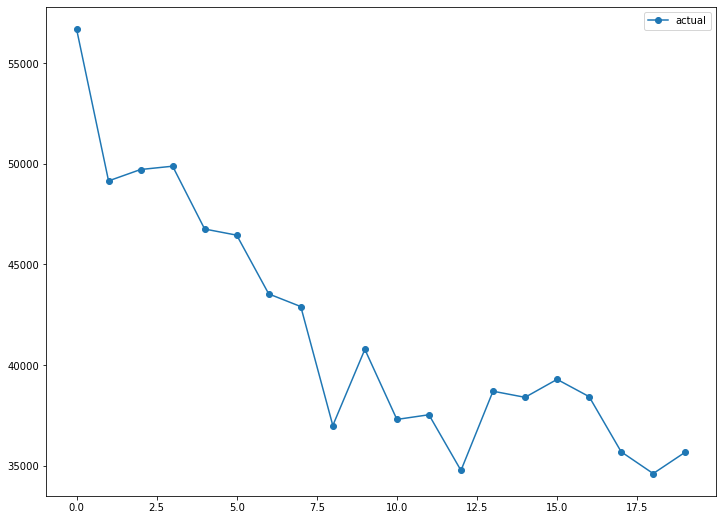

In [157]:
plt.figure(figsize=(12, 9))

bitcoin = bdf['Close'][::-1]
plt.plot(np.asarray(bitcoin[-20:]),marker='o', label = 'actual')
plt.legend()
plt.show()

# doge

In [159]:
rdgc = pd.read_csv('./rnn/Meme Coin/Dogecoin.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)

time_steps = [['2013', '2022']]

dgcc = rdgc.loc[(rdgc.index > time_steps[0][0]) & (rdgc.index < time_steps[0][1])]

dg_scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close','Volume']
dg_scaled = dg_scaler.fit_transform(dgcc[scale_cols])
dg_scaled = pd.DataFrame(dg_scaled, columns=scale_cols)
dg_scaled.columns = scale_cols
dg_scaled
print(dgcc)


                Open      High       Low     Close        Volume    Market Cap
Date                                                                          
2021-06-09  0.326423  0.353762  0.313131  0.343331  3.154333e+09  4.461687e+10
2021-06-08  0.331822  0.341435  0.296660  0.327687  3.918488e+09  4.257938e+10
2021-06-07  0.371566  0.379678  0.329806  0.331050  3.043975e+09  4.301181e+10
2021-06-06  0.371676  0.376798  0.367254  0.371807  1.836611e+09  4.830211e+10
2021-06-05  0.376752  0.393886  0.360488  0.372177  3.464039e+09  4.834516e+10
...              ...       ...       ...       ...           ...           ...
2013-12-19  0.000395  0.001520  0.000328  0.001162  0.000000e+00  1.115034e+07
2013-12-18  0.000267  0.000362  0.000205  0.000362  0.000000e+00  3.188943e+06
2013-12-17  0.000207  0.000289  0.000116  0.000269  0.000000e+00  2.169688e+06
2013-12-16  0.000299  0.000866  0.000150  0.000205  0.000000e+00  1.509085e+06
2013-12-15  0.000559  0.000904  0.000290  0.000298  

<ipython-input-136-06081ea7052f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


In [173]:
TEST_SIZE = 40
WINDOW_SIZE = 20

dg_train = dg_scaled[:-TEST_SIZE]
dg_test = dg_scaled[-TEST_SIZE:]

print(dg_train.shape)
print(dg_test.shape)
a = ['Open', 'High', 'Low', 'Volume']
b = ['Close']
dg_train_feature = dg_train[a]
dg_train_y = dg_train[b]

dg_train_feature,dg_train_y = make_dataset(dg_train_feature,dg_train_y,WINDOW_SIZE)

dg_x_train,dg_x_v,dg_y_train,dg_y_v = train_test_split(dg_train_feature,dg_train_y, test_size=0.2)
print(dg_x_train.shape)


(2694, 5)
(40, 5)
(2139, 20, 4)


In [174]:
dg_test_feature = dg_test[a]
dg_test_y = dg_test[b]
dg_test_feature,dg_test_y = make_dataset(dg_test_feature,dg_test_y,WINDOW_SIZE)
print(dg_test_feature.shape)

(20, 20, 4)


In [175]:
dg_model = Sequential()
dg_model.add(LSTM(16, 
               input_shape=(dg_train_feature.shape[1], dg_train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

dg_model.add(Dense(1))

# epoch는 각 데이터의 size가 2139인 batch가 들어간 134 번의 iteration으로 나누어집니다.

# 그리고 전체 데이터셋에 대해서는 epochs 200 번의 학습이 이루어졌으며, iteration 기준으로 최대 26800 번의 학습을한다.


In [176]:
import os

dg_model.compile(loss='mean_squared_error', optimizer='adam')
dg_early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
dg_filename = os.path.join(model_path, 'tmp_checkpoint.h5')
dg_checkpoint = ModelCheckpoint(dg_filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
dg_history = dg_model.fit(dg_x_train, dg_y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(dg_x_v, dg_y_v), 
                                    callbacks=[dg_early_stop, dg_checkpoint])

Epoch 1/200
134/134 [==============================] - 3s 9ms/step - loss: 0.0072 - val_loss: 0.0012

Epoch 00001: val_loss improved from inf to 0.00116, saving model to model\tmp_checkpoint.h5
Epoch 2/200
134/134 [==============================] - 1s 5ms/step - loss: 9.6533e-04 - val_loss: 6.8464e-04

Epoch 00002: val_loss improved from 0.00116 to 0.00068, saving model to model\tmp_checkpoint.h5
Epoch 3/200
134/134 [==============================] - 1s 5ms/step - loss: 8.1322e-04 - val_loss: 5.0679e-04

Epoch 00003: val_loss improved from 0.00068 to 0.00051, saving model to model\tmp_checkpoint.h5
Epoch 4/200
134/134 [==============================] - 1s 5ms/step - loss: 1.5600e-04 - val_loss: 4.6630e-04

Epoch 00004: val_loss improved from 0.00051 to 0.00047, saving model to model\tmp_checkpoint.h5
Epoch 5/200
134/134 [==============================] - 1s 5ms/step - loss: 1.3714e-04 - val_loss: 4.2897e-04

Epoch 00005: val_loss improved from 0.00047 to 0.00043, saving model to model\

In [177]:
dg_model.load_weights(dg_filename)

dg_pred = dg_model.predict(dg_test_feature)


dg_pred.shape

(20, 1)

(20, 1)


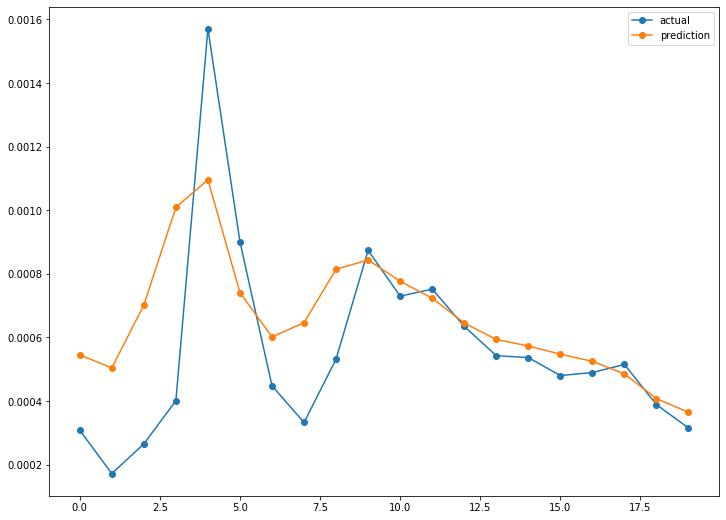

In [239]:
def dg_ls_result():
    plt.figure(figsize=(12, 9))
    print(dg_test_y.shape)
    plt.plot(np.asarray(dg_test_y[-20:])[::-1],marker='o', label = 'actual')
    plt.plot(dg_pred[-20:][::-1], label = 'prediction',marker='o')
    plt.legend()
    plt.show()

dg_ls_result()


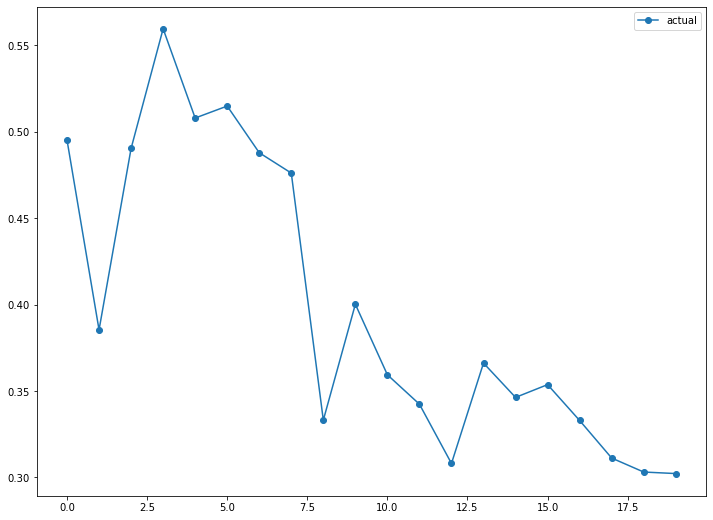

In [181]:
plt.figure(figsize=(12, 9))

doge = dgc['Close'][::-1]
plt.plot(np.asarray(doge[-20:]),marker='o', label = 'actual')
plt.legend()
plt.show()



# ethereum

In [220]:
reth = pd.read_csv('./rnn/Ethereum.csv', index_col='Date',parse_dates=["Date"],date_parser=dateparse)

time_steps = [['2018', '2022']]

ethe = reth.loc[(reth.index > time_steps[0][0]) & (reth.index < time_steps[0][1])]

eth_price = eth[:10]
eth_scaler = MinMaxScaler()
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
eth_scaled = eth_scaler.fit_transform(ethe[scale_cols])
eth_scaled = pd.DataFrame(eth_scaled, columns=scale_cols)
eth_scaled.columns = scale_cols
print(eth_price)
eth_scaled

                   Open         High          Low        Close        Volume  \
Date                                                                           
2021-05-30  2278.288703  2472.187818  2188.834504  2390.305302  2.587662e+10   
2021-05-29  2414.067182  2566.938597  2208.490927  2279.514177  3.377372e+10   
2021-05-28  2742.468984  2761.363366  2336.361233  2419.906290  3.999911e+10   
2021-05-27  2888.752388  2888.752388  2642.607841  2736.488586  3.337364e+10   
2021-05-26  2707.052740  2911.735706  2652.094510  2888.698681  4.249977e+10   
2021-05-25  2649.033218  2750.534979  2394.355560  2706.628981  4.955833e+10   
2021-05-24  2099.935914  2672.595670  2090.639574  2643.590995  5.369712e+10   
2021-05-23  2298.367067  2384.411697  1737.468748  2109.579852  5.600572e+10   
2021-05-22  2436.014567  2483.983114  2168.124317  2295.705657  4.208994e+10   
2021-05-21  2772.341276  2938.205084  2113.347149  2430.621385  5.377407e+10   

              Market Cap  Year  month  

<ipython-input-136-06081ea7052f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%d-%m-%Y')


,Open,High,Low,Close,Volume
0,0.593083,0.593810,0.629046,0.617952,0.420513
1,0.613717,0.592822,0.602945,0.595714,0.490352
2,0.642675,0.645274,0.675440,0.613544,0.354963
3,0.622310,0.621486,0.684126,0.644107,0.291654
4,0.637436,0.638798,0.668483,0.623414,0.353725
...,...,...,...,...,...
1250,0.222688,0.228049,0.246229,0.234398,0.044458
1251,0.217944,0.231481,0.235887,0.223635,0.068650
1252,0.214513,0.224395,0.233122,0.219522,0.066492
1253,0.196003,0.207886,0.212157,0.215065,0.049616


In [221]:
TEST_SIZE = 40
WINDOW_SIZE = 20

eth_train = eth_scaled[:-TEST_SIZE]
eth_test = eth_scaled[-TEST_SIZE:]

print(eth_train.shape)
print(eth_test.shape)
a = ['Open', 'High', 'Low', 'Volume']
b = ['Close']
eth_train_feature = eth_train[a]
eth_train_y = eth_train[b]

eth_train_feature,eth_train_y = make_dataset(eth_train_feature,eth_train_y,WINDOW_SIZE)

eth_x_train,eth_x_v,eth_y_train,eth_y_v = train_test_split(eth_train_feature,eth_train_y, test_size=0.2)
print(eth_x_train.shape)

(1215, 5)
(40, 5)
(956, 20, 4)


In [222]:
eth_test_feature = eth_test[a]
eth_test_y = eth_test[b]
eth_test_feature,eth_test_y = make_dataset(eth_test_feature,eth_test_y,WINDOW_SIZE)
print(eth_test_feature.shape)

(20, 20, 4)


In [223]:
eth_model = Sequential()
eth_model.add(LSTM(16, 
               input_shape=(eth_train_feature.shape[1], eth_train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

eth_model.add(Dense(1))

# epoch는 각 데이터의 size가 956인 batch가 들어간 60 번의 iteration으로 나누어집니다.

# 그리고 전체 데이터셋에 대해서는 epochs 200 번의 학습이 이루어졌으며, iteration 기준으로 최대 12000(200*60) 번의 학습을한다.


In [224]:
import os

eth_model.compile(loss='mean_squared_error', optimizer='adam')
eth_early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
eth_filename = os.path.join(model_path, 'tmp_checkpoint.h5')
eth_checkpoint = ModelCheckpoint(eth_filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
eth_history = eth_model.fit(eth_x_train, eth_y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(eth_x_v, eth_y_v), 
                                    callbacks=[eth_early_stop, eth_checkpoint])

Epoch 1/200
60/60 [==============================] - 3s 14ms/step - loss: 0.0231 - val_loss: 0.0014

Epoch 00001: val_loss improved from inf to 0.00144, saving model to model\tmp_checkpoint.h5
Epoch 2/200
60/60 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 4.5210e-04

Epoch 00002: val_loss improved from 0.00144 to 0.00045, saving model to model\tmp_checkpoint.h5
Epoch 3/200
60/60 [==============================] - 0s 5ms/step - loss: 6.6852e-04 - val_loss: 2.4175e-04

Epoch 00003: val_loss improved from 0.00045 to 0.00024, saving model to model\tmp_checkpoint.h5
Epoch 4/200
60/60 [==============================] - 0s 6ms/step - loss: 3.1612e-04 - val_loss: 2.1076e-04

Epoch 00004: val_loss improved from 0.00024 to 0.00021, saving model to model\tmp_checkpoint.h5
Epoch 5/200
60/60 [==============================] - 0s 5ms/step - loss: 2.6716e-04 - val_loss: 1.8268e-04

Epoch 00005: val_loss improved from 0.00021 to 0.00018, saving model to model\tmp_checkpoin

In [225]:
eth_model.load_weights(eth_filename)
eth_pred = eth_model.predict(eth_test_feature)

eth_pred.shape

(20, 1)

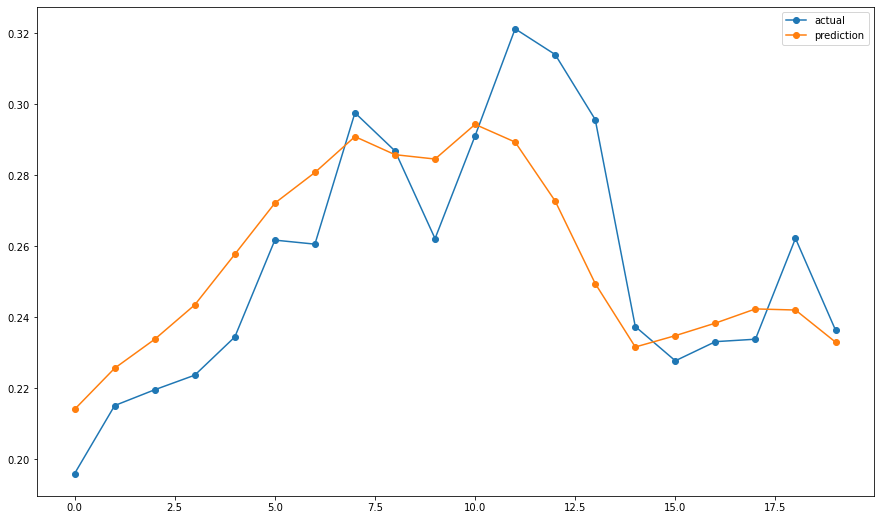

In [240]:
def eth_ls_result():
    plt.figure(figsize=(15,9))
    plt.plot(np.asarray(eth_test_y[-30:])[::-1],marker='o', label = 'actual')
    plt.plot(eth_pred[-30:][::-1], label = 'prediction',marker='o')
    plt.legend()
    plt.show()
    
eth_ls_result()

(20, 1)


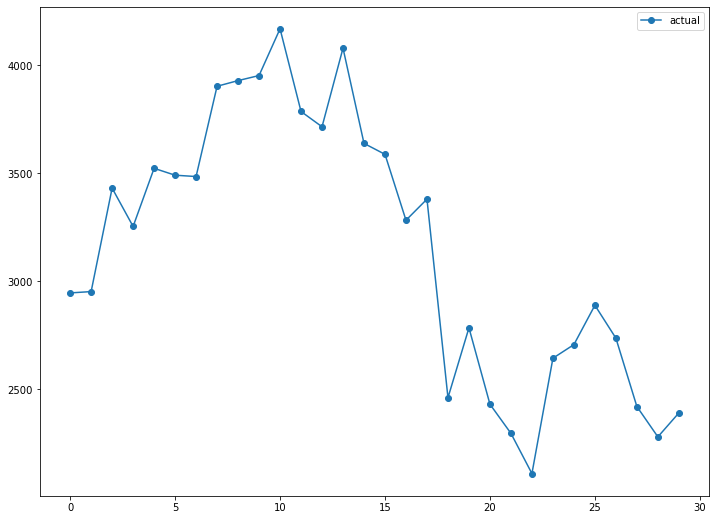

In [227]:
plt.figure(figsize=(12, 9))
print(eth_test_y.shape)

ethereum = ethc['Close'][::-1]
plt.plot(np.asarray(ethereum[-30:]),marker='o', label = 'actual')
plt.legend()
plt.show()

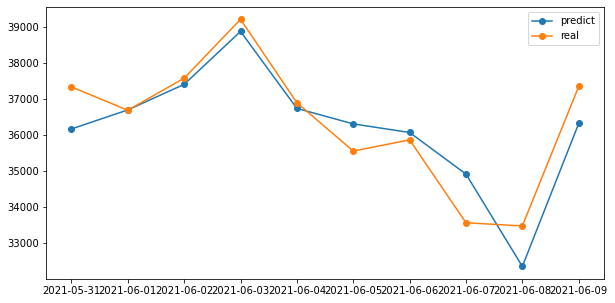

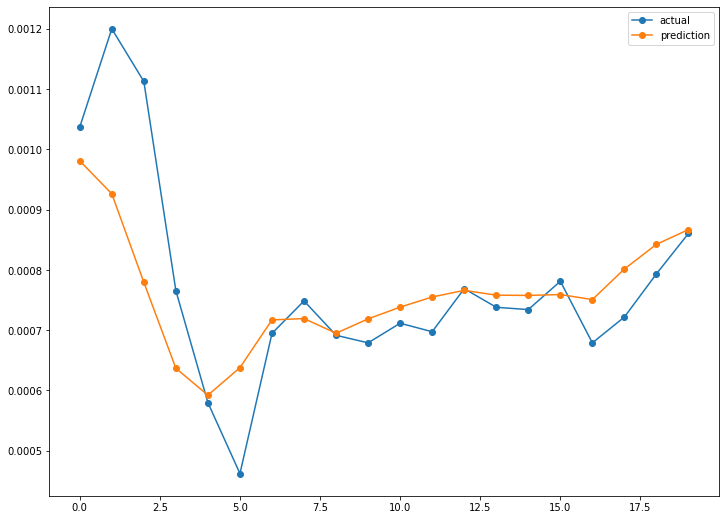

In [284]:
bit_ly_result()
bt_ls_result()

(20, 1)


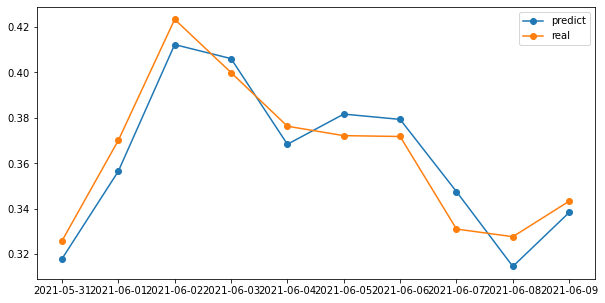

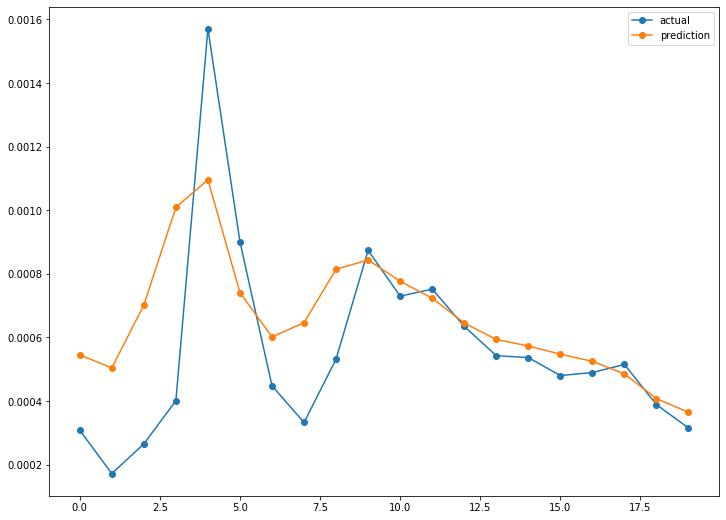

In [282]:
doge_ly_result()
dg_ls_result()

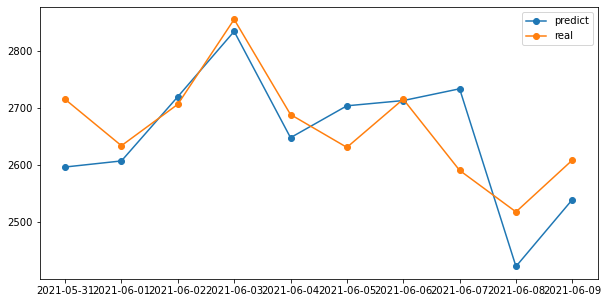

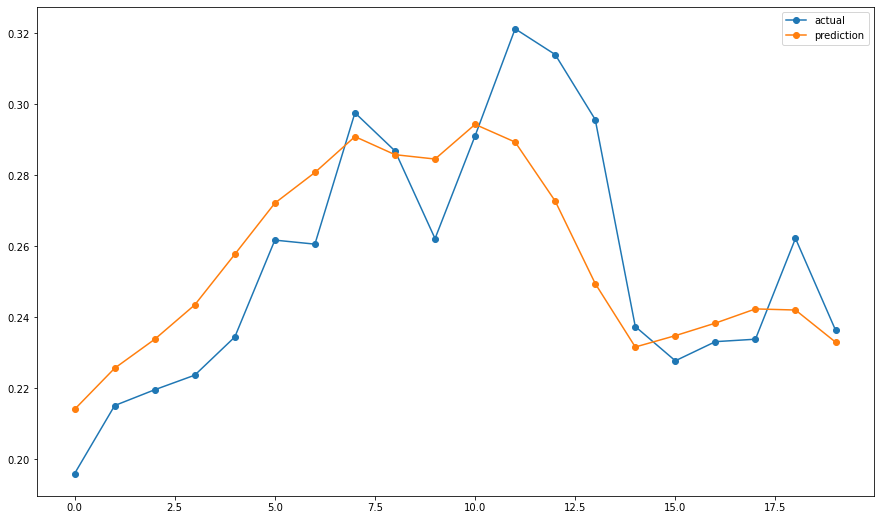

In [285]:
eth_ly_result()
eth_ls_result()

# 결과
linear regression과 lstm을 비교했을 때  linear regression은 경사하강법으로 동작함으로 데이터들의 미분값(경사하강법)에 의해서 계산되고 독립 변수(open,hign,low)에 대하여 종속 변수(close)값들 사이에 관계를 예측 데이터를 통해 보여주었다.

lstm은 과거 데이터와 현재데이터를 두고 연산을 통해 적용할지 말지에 대해 결정하는 알고리즘에 의한 결과값에 대한 예측 데이터를 보여주었다.

과거데이터에 의존해 미래데이터를 예측하는 것은 독립변수로 작용 하기 때문에 
정확한 예측 값을 얻는 것은 이론적으로 불가능하므로 linear regression 처럼 
이동평균선 성향을 보이는 그래프와 lstm을 적용한 그래프를 활용하여 추세를 
확인하는 데에 사용하는 것이 적절하다.
